In [4]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

In [5]:
df = pd.read_csv("height.csv")
df.sample(5)

,Gender,Height
8071,Female,64.359316
4732,Male,66.990141
3662,Male,66.372782
6053,Female,62.864633
1212,Male,69.594826


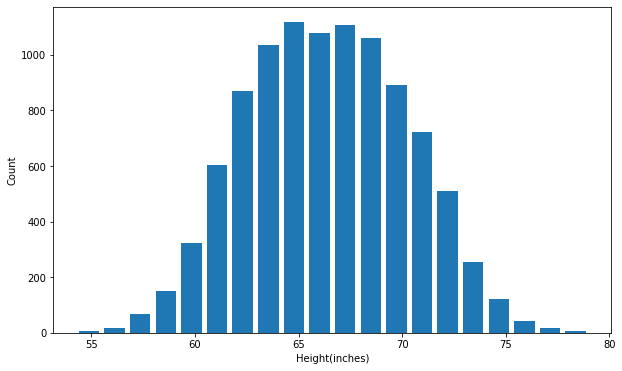

In [6]:
plt.hist(df.Height , bins=20, rwidth=0.8)
plt.xlabel('Height(inches)')
plt.ylabel('Count')
plt.show()

In [7]:
df.Height.max()

78.99874235

In [8]:
df.Height.min()

54.26313333

In [9]:
df.Height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

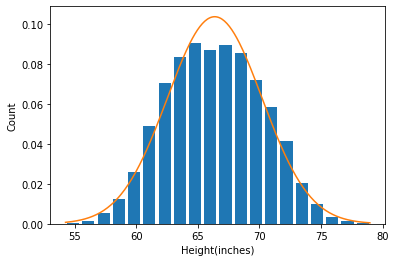

In [11]:
from scipy.stats import norm
import numpy as np
%matplotlib inline
plt.hist(df.Height , bins=20, rwidth=0.8 ,density = True)
plt.xlabel('Height(inches)')
plt.ylabel('Count')

rng = np.arange(df.Height.min(), df.Height.max(), 0.1)
plt.plot(rng , norm.pdf(rng,df.Height.mean(),df.Height.std()))

In [12]:
df.Height.mean()

66.3675597548656

In [13]:
df.Height.std()

3.847528120795573

In [14]:
upper_limit = df.Height.mean() + 3*df.Height.std()
upper_limit

77.91014411725232

In [15]:
lower_limit = df.Height.mean() - 3*df.Height.std()
lower_limit

54.824975392478876

In [16]:
df[(df.Height>upper_limit)|(df.Height<lower_limit)]

,Gender,Height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [17]:
df_no_outlier_std_dev = df[(df.Height<upper_limit)&(df.Height>lower_limit)]
df_no_outlier_std_dev.shape

(9993, 2)

In [18]:
df.shape[0] - df_no_outlier_std_dev.shape[0]

7

In [19]:
df['zscore'] = (df.Height - df.Height.mean())/df.Height.std()
df.head(5)

,Gender,Height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [20]:
(73.847017-66.37)/3.84

1.9471398437499974

In [21]:
df[df['zscore']>3]

,Gender,Height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [22]:
df[df['zscore']<-3]

,Gender,Height,zscore
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [23]:
df[(df.zscore>-3) | (df.zscore<-3)]

,Gender,Height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090


In [24]:
df_no_outliers =df[(df.zscore>-3) & (df.zscore<3)]
df_no_outliers.head()

,Gender,Height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [25]:
df.shape[0] - df_no_outliers.shape[0]

7